In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_dir = 'C:\\Users\\hakam\\UPN\\Bangkit\\Capstone\\Data\\Diving Eqp'

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_set = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_set = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 455 images belonging to 5 classes.
Found 110 images belonging to 5 classes.


In [4]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
base_model.trainable = False

In [5]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
history = model.fit(train_set,
                    epochs=10,
                    validation_data=val_set,)

Epoch 1/10


C:\UPN_Kuliah\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\UPN_Kuliah\Anaconda\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 999ms/step - accuracy: 0.5943 - loss: 1.1591 - val_accuracy: 0.9818 - val_loss: 0.1205
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 641ms/step - accuracy: 0.8990 - loss: 0.2510 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 716ms/step - accuracy: 0.9674 - loss: 0.0847 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 732ms/step - accuracy: 0.9809 - loss: 0.0498 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 662ms/step - accuracy: 0.9906 - loss: 0.0353 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 662ms/step - accuracy: 0.9781 - loss: 0.0894 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 645ms/step - accuracy: 0.9862 - loss: 0.0389 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 694ms/step - accuracy: 0.9949 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 0.

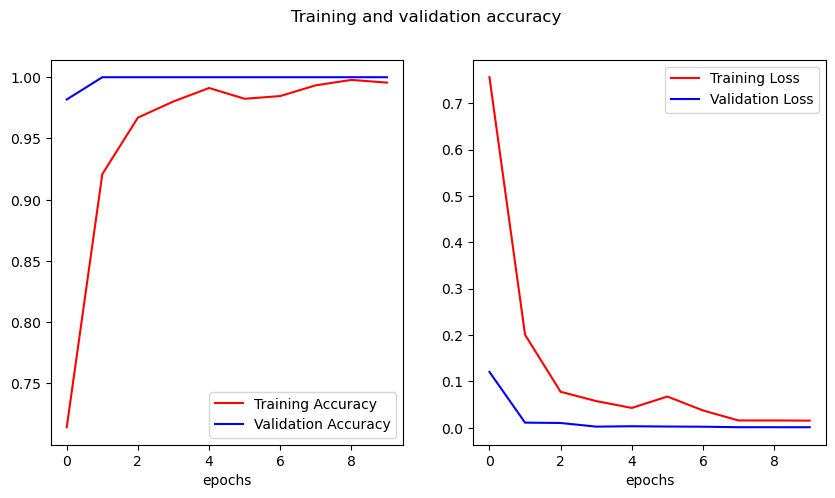

In [8]:
# Get training summary validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 32)       │       368,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,371,313 (12.86 MB)

 Trainable params: 371,109 (1.42 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 742,220 (2.83 MB)

In [10]:
print (train_set.class_indices)

labels = '\n'.join(sorted(train_set.class_indices.keys()))

with open('labels Equipments.txt', 'w') as f:
    f.write(labels) 

{'Diving Fins': 0, 'Diving Mask': 1, 'Diving Oxygen Tank': 2, 'Diving Regulators': 3, 'Diving Wetsuit': 4}


In [11]:
#save the model
saved_model_path = "equipments.h5"

model.save(saved_model_path)